# Множественная линейная регрессия на чистых данных

### Задания для выполнения

1. Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).
2. Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен `x`) и значениями целевой переменной (помечен `y`). Файлы не содержат заголовков столбцов и строк.
3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.
4. Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.
Для целевой и каждого из признаков постройте парную регрессионную модель. 
5. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.
6. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.



### Методические указания
1. Отчет по лабораторной работе сдается в виде файла интерактивного ноутбука Jupyter notebook и должен включать весь программный код, реализующий задания лабораторной работы, подробные пояснения, обоснования и выводы там, где это требуется в виде текстовых ячеек.
2. Для сведения статистических данных можно воспользоваться средствами библиотек sklearn, numpy и pandas, либо табличным редактором Microsoft Excel. В любом случае, к отчету по лабораторной работе следует приложить как исходные данные без обработки, так и итоговый датасет, использующийся при обучении.
3. Для диагностики обучения регрессионных моделей рекомендуется строить кривые обучения. Используйте пример из документации sklearn как образец.
4. Для оценки качества построенной регрессии можно использовать целый ряд показателей. Одним из самых простых и универсальных является коэффициент детерминации (R2-score). Как использовать его читайте в официальной документации sklearn.

Приведем пример создания модели парной линейной регрессии средствами библиотеки scikit learn:


In [ ]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('darkgrid')

Импорт таблицы


In [ ]:
X = pd.read_csv('/content/drive/MyDrive/Учёба/data/31_x.csv',names=['x1','x2','x3','x4'])
Y = pd.read_csv('/content/drive/MyDrive/Учёба/data/31_y.csv',names=['y'])

494

In [ ]:
X.describe()

,x1,x2,x3,x4
count,495.000000,495.000000,495.000000,495.000000
mean,-0.004560,0.060528,0.061930,0.016027
std,0.925465,1.048155,1.060839,1.046299
min,-2.607613,-2.824730,-3.017320,-3.417505
25%,-0.600787,-0.718748,-0.726036,-0.691999
50%,-0.031647,0.035703,0.005394,0.045603
75%,0.669919,0.793574,0.774342,0.744176
max,3.029453,3.164677,3.158047,3.013836


In [ ]:
Y.describe()

,y
count,495.000000
mean,7.499311
std,93.583821
min,-294.231674
25%,-55.430544
50%,10.510431
75%,69.092113
max,245.590853


In [ ]:
index_list = np.arange(0,len(X['x1']))
np.random.shuffle(index_list)
train_index = index_list[:int(len(X['x1'])*0.8)]
test_index =  index_list[int(len(X['x1'])*0.8):]

In [ ]:
x1_train = X.iloc[train_index]['x1'].values.reshape(-1,1)
x2_train = X.iloc[train_index]['x2'].values.reshape(-1,1)
x3_train = X.iloc[train_index]['x3'].values.reshape(-1,1)
x4_train = X.iloc[train_index]['x4'].values.reshape(-1,1)
y_train = Y.iloc[train_index]['y'].values.reshape(-1,1)

In [ ]:
x1_test = X.iloc[test_index]['x1'].values.reshape(-1,1)
x2_test = X.iloc[test_index]['x2'].values.reshape(-1,1)
x3_test = X.iloc[test_index]['x3'].values.reshape(-1,1)
x4_test = X.iloc[test_index]['x4'].values.reshape(-1,1)
y_test = Y.iloc[test_index]['y'].values.reshape(-1,1)

Создаем пустую модель:


In [ ]:
model = linear_model.LinearRegression()

Обучение машины с помощью метода fit(X, Y) - расчет параметров для указанных данных:



$$\hat{y}(w,x)=w_0+w_1x_1 - \text{модель парной регрессии}$$

## $$x_1$$

In [ ]:
model.fit(x1_train, y_train)

LinearRegression()

In [ ]:
model.intercept_, model.coef_

(array([8.06130198]), array([[2.75135847]]))

$$\hat{y}_1=6.41+4.35x_1$$

In [ ]:
predicted = model.predict(x1_test)

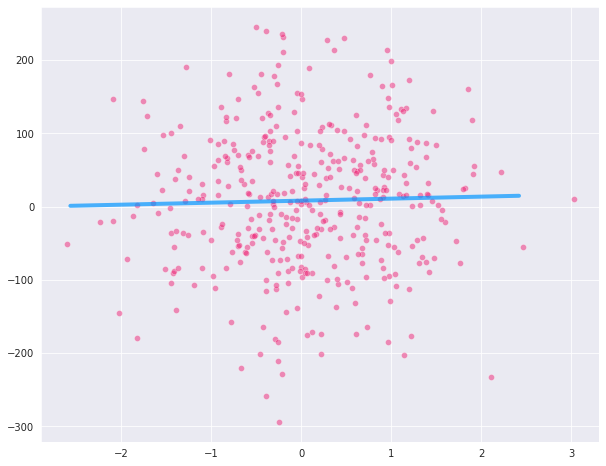

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x1_train.reshape((1, -1))[0], y=y_train.reshape((1, -1))[0], color ='#EE2677', alpha =0.5)
sns.lineplot(x=x1_test.reshape((1, -1))[0], y=predicted.reshape((1, -1))[0], color ='#0496FF', alpha =0.7, lw = 4)
plt.show()

In [ ]:
model.score(x1_test, y_test)

0.0033139541626012736

In [ ]:
score_df = pd.DataFrame([model.intercept_[0],
                         model.coef_[0].tolist()[0],
                         '-',
                         '-',
                         '-',
                         model.score(x1_test, y_test),
                         np.mean(abs(predicted-y_test)),
                         np.sqrt(np.mean((predicted-y_test)**2)),
                         np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test))),
                         np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)],
                         index=['b0','b1','b2','b3','b4','R^2','MAE', 'RMSE','RAE','RSE'],columns=['y, x1'])

In [ ]:
score_df

,"y, x1"
b0,8.061302
b1,2.751358
b2,-
b3,-
b4,-
R^2,0.003314
MAE,74.264037
RMSE,89.94364
RAE,0.997762
RSE,0.996686


## $$x_2$$

In [ ]:
model.fit(x2_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression()

In [ ]:
model.intercept_, model.coef_

(array([5.88385853]), array([[52.84137689]]))

$$\hat{y}_2=3.72+50.61x_2$$

In [ ]:
predicted = model.predict(x2_test)

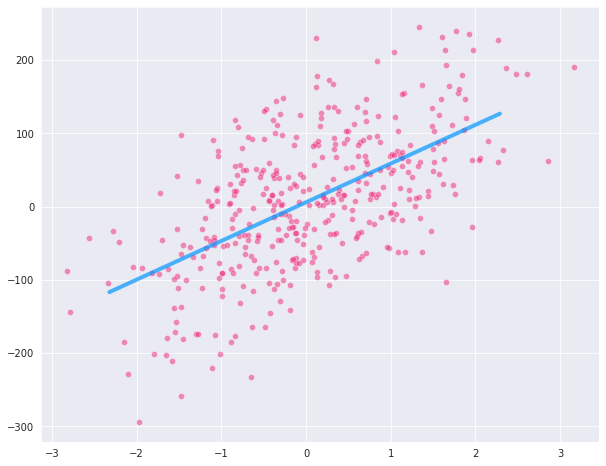

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x2_train.reshape((1, -1))[0], y=y_train.reshape((1, -1))[0], color ='#EE2677', alpha =0.5)
sns.lineplot(x=x2_test.reshape((1, -1))[0], y=predicted.reshape((1, -1))[0], color ='#0496FF', alpha =0.7, lw = 4)
plt.show()

In [ ]:
model.score(x2_test, y_test)

0.3974163593863955

In [ ]:
score_df['y, x2'] = [model.intercept_[0],
                     model.coef_[0].tolist()[0],
                     '-',
                     '-',
                     '-',
                     model.score(x2_test, y_test),
                     np.mean(abs(predicted-y_test)),
                     np.sqrt(np.mean((predicted-y_test)**2)),
                     np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test))),
                     np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)]
score_df

,"y, x1","y, x2"
b0,8.061302,5.883859
b1,2.751358,52.841377
b2,-,-
b3,-,-
b4,-,-
R^2,0.003314,0.397416
MAE,74.264037,56.080112
RMSE,89.94364,69.935863
RAE,0.997762,0.753455
RSE,0.996686,0.602584


## $$x_3$$

In [ ]:
model.fit(x3_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression()

In [ ]:
model.intercept_, model.coef_

(array([2.58554919]), array([[68.01309401]]))

$$\hat{y}_3=3.40+71.27x_3$$

In [ ]:
predicted = model.predict(x3_test)

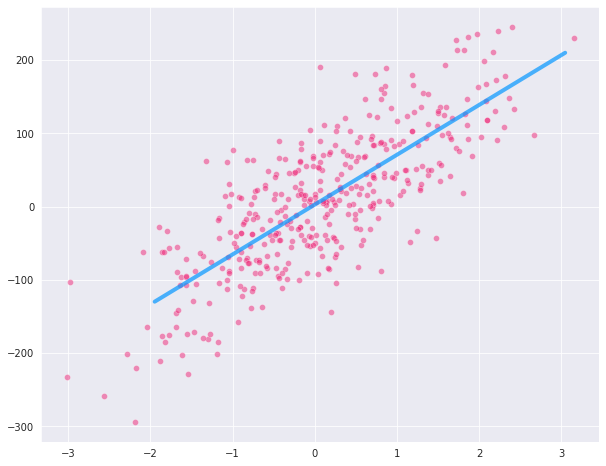

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x3_train.reshape((1, -1))[0], y=y_train.reshape((1, -1))[0], color ='#EE2677', alpha =0.5)
sns.lineplot(x=x3_test.reshape((1, -1))[0], y=predicted.reshape((1, -1))[0], color ='#0496FF', alpha =0.7, lw = 4)
plt.show()

In [ ]:
model.score(x3_test, y_test)

0.6402464623659541

In [ ]:
score_df['y, x3'] = [model.intercept_[0],
                     model.coef_[0].tolist()[0],
                     '-',
                     '-',
                     '-',
                     model.score(x3_test, y_test),
                     np.mean(abs(predicted-y_test)),
                     np.sqrt(np.mean((predicted-y_test)**2)),
                     np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test))),
                     np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)]
score_df

,"y, x1","y, x2","y, x3"
b0,8.061302,5.883859,2.585549
b1,2.751358,52.841377,68.013094
b2,-,-,-
b3,-,-,-
b4,-,-,-
R^2,0.003314,0.397416,0.640246
MAE,74.264037,56.080112,43.153683
RMSE,89.94364,69.935863,54.037321
RAE,0.997762,0.753455,0.579784
RSE,0.996686,0.602584,0.359754


## $$x_4$$

In [ ]:
model.fit(x4_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression()

In [ ]:
model.intercept_, model.coef_

(array([8.38217804]), array([[-6.0391457]]))

$$\hat{y}_4=7.42-3.85x_4$$

In [ ]:
predicted = model.predict(x4_test)

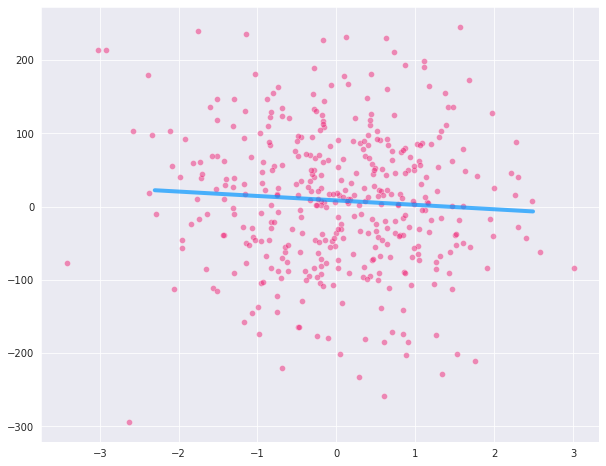

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x4_train.reshape((1, -1))[0], y=y_train.reshape((1, -1))[0], color ='#EE2677', alpha =0.5)
sns.lineplot(x=x4_test.reshape((1, -1))[0], y=predicted.reshape((1, -1))[0], color ='#0496FF', alpha =0.7, lw = 4)
plt.show()

In [ ]:
model.score(x4_test, y_test)

-0.021763521725996604

In [ ]:
score_df['y, x4'] = [model.intercept_[0],
                     model.coef_[0].tolist()[0],
                     '-',
                     '-',
                     '-',
                     model.score(x4_test, y_test),
                     np.mean(abs(predicted-y_test)),
                     np.sqrt(np.mean((predicted-y_test)**2)),
                     np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test))),
                     np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)]
score_df

,"y, x1","y, x2","y, x3","y, x4"
b0,8.061302,5.883859,2.585549,8.382178
b1,2.751358,52.841377,68.013094,-6.039146
b2,-,-,-,-
b3,-,-,-,-
b4,-,-,-,-
R^2,0.003314,0.397416,0.640246,-0.021764
MAE,74.264037,56.080112,43.153683,75.082449
RMSE,89.94364,69.935863,54.037321,91.06814
RAE,0.997762,0.753455,0.579784,1.008758
RSE,0.996686,0.602584,0.359754,1.021764


# Множественная регрессия

In [ ]:
X.values

array([[-1.29100786, -1.05102348,  0.78143646,  2.47617333],
       [-1.62817474,  0.5617408 ,  0.88148748,  0.86612139],
       [ 0.97653375,  1.04592469, -0.01547509, -0.37656417],
       ...,
       [-0.63468329, -0.89716934,  1.30030102, -0.50695639],
       [-0.60702624,  0.957809  , -1.67408218,  0.49291176],
       [-0.17149524, -2.7831023 ,  0.19534766, -0.75036019]])

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset: 80% vs 20% 
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.2, random_state=313)

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.intercept_, model.coef_

(array([-0.21546294]),
 array([[-0.65212075, 54.40312108, 69.91523726,  4.33970203]]))

$$\hat{y}=-0.22-0.65x_1+54.40x_2+69.92x_3+4.34x_4$$

In [ ]:
predicted = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

0.9905458234563498

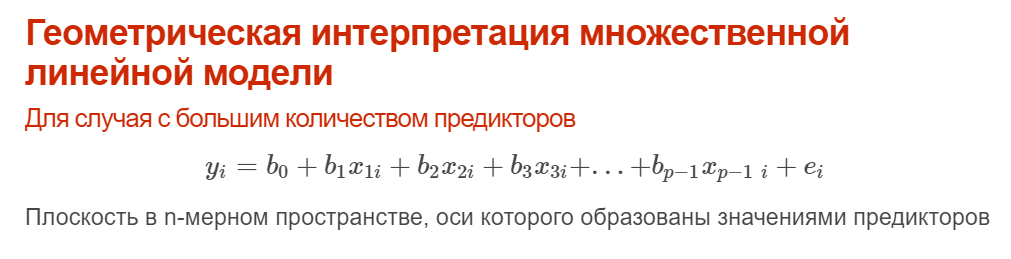

In [ ]:
score_df['y, X'] = [model.intercept_[0],
                    model.coef_[0].tolist()[0],
                    model.coef_[0].tolist()[1],
                    model.coef_[0].tolist()[2],
                    model.coef_[0].tolist()[3],
                    model.score(X_test, y_test),
                    np.mean(abs(predicted-y_test)),
                    np.sqrt(np.mean((predicted-y_test)**2)),
                    np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test))),
                    np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)]
score_df

,"y, x1","y, x2","y, x3","y, x4","y, X"
b0,8.061302,5.883859,2.585549,8.382178,-0.215463
b1,2.751358,52.841377,68.013094,-6.039146,-0.652121
b2,-,-,-,-,54.403121
b3,-,-,-,-,69.915237
b4,-,-,-,-,4.339702
R^2,0.003314,0.397416,0.640246,-0.021764,0.990546
MAE,74.264037,56.080112,43.153683,75.082449,7.091187
RMSE,89.94364,69.935863,54.037321,91.06814,8.770553
RAE,0.997762,0.753455,0.579784,1.008758,0.098495
RSE,0.996686,0.602584,0.359754,1.021764,0.009454


In [ ]:
pd.DataFrame(abs(y_test - predicted)).describe()

,0
count,99.000000
mean,7.091187
std,5.187435
min,0.292894
25%,3.337641
50%,5.940231
75%,9.891513
max,23.236802


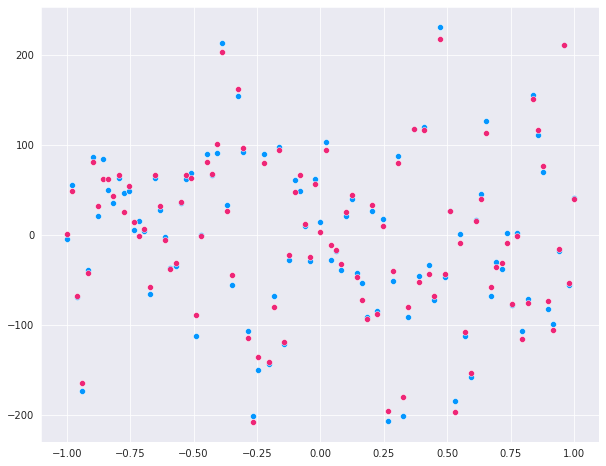

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=np.linspace(-1,1,99),y=y_test.reshape(1,-1)[0], color='#0496FF')
sns.scatterplot(x=np.linspace(-1,1,99),y=predicted.reshape(1,-1)[0], color ='#EE2677')
plt.show()

# Дополнительные задания
1. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.
2. Постройте сводную таблицу показателей точности всех построенных моделей по тестовой и обучающей выборке. Сделайте вывод, какие модели переобученнные, какие - недообученные.
3. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.
4. (*) Замерьте время обучения на разных объемах данных и количестве признаков. Сделайте вывод о зависимости скорости обучения от объема обучающей выборки.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

## $$x_1$$

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X['x1'].values, Y.values, test_size=0.2, random_state=133)

X_seq_train = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
X_seq_test = np.linspace(X_test.min(),X_test.max(),300).reshape(-1,1)

polyreg_2=make_pipeline(PolynomialFeatures(2),LinearRegression())
polyreg_2.fit(X_train.reshape(-1,1),y_train)

polyreg_3=make_pipeline(PolynomialFeatures(3),LinearRegression())
polyreg_3.fit(X_train.reshape(-1,1),y_train)

polyreg_10=make_pipeline(PolynomialFeatures(10),LinearRegression())
polyreg_10.fit(X_train.reshape(-1,1),y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])

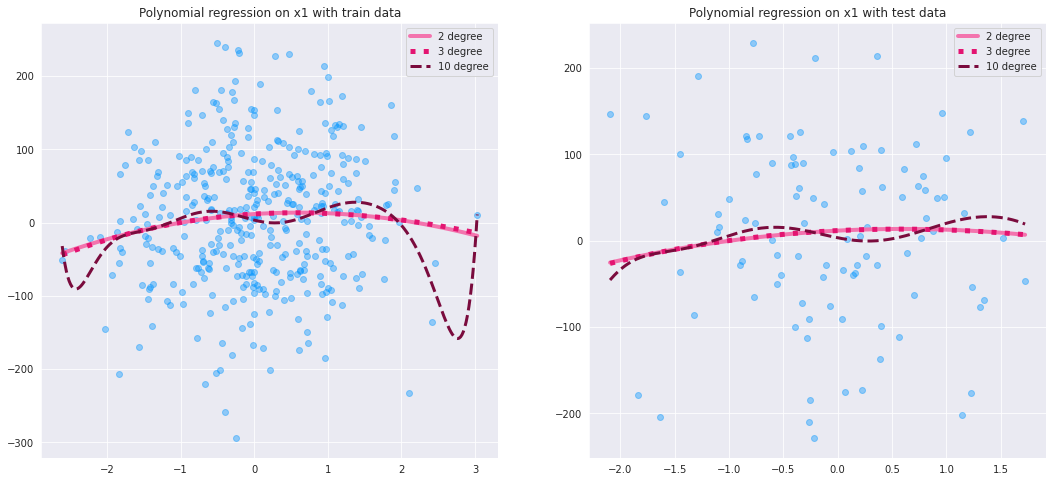

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

ax1.scatter(X_train, y_train, color='#0496FF', alpha = 0.4)
ax1.plot(X_seq_train, polyreg_2.predict(X_seq_train), color="#F374AE", lw = 4, linestyle = 'solid', label='2 degree')
ax1.plot(X_seq_train, polyreg_3.predict(X_seq_train), color="#E31471", lw = 5, linestyle = 'dotted', label='3 degree')
ax1.plot(X_seq_train, polyreg_10.predict(X_seq_train), color="#7A0B3D", lw = 3, linestyle = 'dashed', label='10 degree')
ax1.set_title("Polynomial regression on x1 with train data")
ax1.legend()

ax2.scatter(X_test, y_test, color='#0496FF', alpha = 0.4)
ax2.plot(X_seq_test, polyreg_2.predict(X_seq_test), color="#F374AE", lw = 4, linestyle = 'solid', label='2 degree')
ax2.plot(X_seq_test, polyreg_3.predict(X_seq_test), color="#E31471", lw = 5, linestyle = 'dotted', label='3 degree')
ax2.plot(X_seq_test, polyreg_10.predict(X_seq_test), color="#7A0B3D", lw = 3, linestyle = 'dashed', label='10 degree')
ax2.set_title("Polynomial regression on x1 with test data")
ax2.legend()

In [ ]:
polyscore_df = pd.DataFrame([[2,
                              polyreg_2.score(X_train.reshape(-1,1), y_train),
                              polyreg_2.score(X_test.reshape(-1,1), y_test)],
                             [3,
                              polyreg_3.score(X_train.reshape(-1,1), y_train),
                              polyreg_3.score(X_test.reshape(-1,1), y_test)],
                             [10,
                              polyreg_10.score(X_train.reshape(-1,1), y_train),
                              polyreg_10.score(X_test.reshape(-1,1), y_test)]],
                            columns=['Degree','R^2 train','R^2 test'], index=['x1','x1','x1',])

polyscore_df

,Degree,R^2 train,R^2 test
x1,2,0.009353,-0.016972
x1,3,0.009369,-0.016783
x1,10,0.024333,-0.018364


## $$x_2$$

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X['x2'].values, Y.values, test_size=0.2, random_state=133)

X_seq_train = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
X_seq_test = np.linspace(X_test.min(),X_test.max(),300).reshape(-1,1)

polyreg_2=make_pipeline(PolynomialFeatures(2),LinearRegression())
polyreg_2.fit(X_train.reshape(-1,1),y_train)

polyreg_3=make_pipeline(PolynomialFeatures(3),LinearRegression())
polyreg_3.fit(X_train.reshape(-1,1),y_train)

polyreg_10=make_pipeline(PolynomialFeatures(10),LinearRegression())
polyreg_10.fit(X_train.reshape(-1,1),y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])

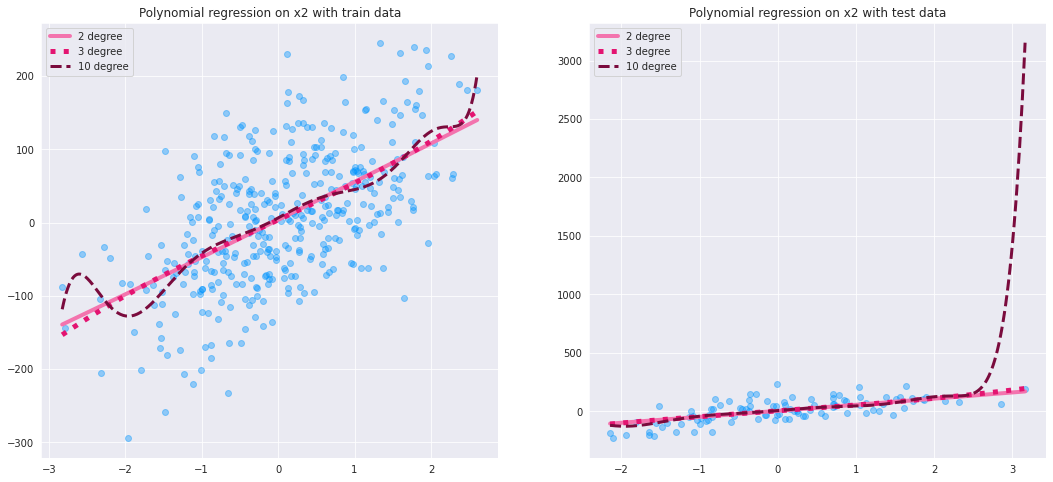

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# plt.figure(figsize=(10, 8))
ax1.scatter(X_train, y_train, color='#0496FF', alpha = 0.4)
ax1.plot(X_seq_train, polyreg_2.predict(X_seq_train), color="#F374AE", lw = 4, linestyle = 'solid', label='2 degree')
ax1.plot(X_seq_train, polyreg_3.predict(X_seq_train), color="#E31471", lw = 5, linestyle = 'dotted', label='3 degree')
ax1.plot(X_seq_train, polyreg_10.predict(X_seq_train), color="#7A0B3D", lw = 3, linestyle = 'dashed', label='10 degree')
ax1.set_title("Polynomial regression on x2 with train data")
ax1.legend()

ax2.scatter(X_test, y_test, color='#0496FF', alpha = 0.4)
ax2.plot(X_seq_test, polyreg_2.predict(X_seq_test), color="#F374AE", lw = 4, linestyle = 'solid', label='2 degree')
ax2.plot(X_seq_test, polyreg_3.predict(X_seq_test), color="#E31471", lw = 5, linestyle = 'dotted', label='3 degree')
ax2.plot(X_seq_test, polyreg_10.predict(X_seq_test), color="#7A0B3D", lw = 3, linestyle = 'dashed', label='10 degree')
ax2.set_title("Polynomial regression on x2 with test data")
ax2.legend()

In [ ]:
polyscore_df = polyscore_df.append(pd.DataFrame([[2, polyreg_2.score(X_train.reshape(-1,1), y_train),
                                                  polyreg_2.score(X_test.reshape(-1,1), y_test)],
                                                  [3, polyreg_3.score(X_train.reshape(-1,1), y_train), 
                                                  polyreg_3.score(X_test.reshape(-1,1), y_test)],
                                                  [10, polyreg_10.score(X_train.reshape(-1,1), y_train),
                                                  polyreg_10.score(X_test.reshape(-1,1), y_test)]], 
                                                columns=['Degree','R^2 train','R^2 test'], index=['x2', 'x2', 'x2']))

polyscore_df

,Degree,R^2 train,R^2 test
x1,2,0.009353,-0.016972
x1,3,0.009369,-0.016783
x1,10,0.024333,-0.018364
x2,2,0.330315,0.463348
x2,3,0.330825,0.460006
x2,10,0.342427,-8.610301


## $$x_3$$

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X['x3'].values, Y.values, test_size=0.2, random_state=133)

X_seq_train = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
X_seq_test = np.linspace(X_test.min(),X_test.max(),300).reshape(-1,1)

polyreg_2=make_pipeline(PolynomialFeatures(2),LinearRegression())
polyreg_2.fit(X_train.reshape(-1,1),y_train)

polyreg_3=make_pipeline(PolynomialFeatures(3),LinearRegression())
polyreg_3.fit(X_train.reshape(-1,1),y_train)

polyreg_10=make_pipeline(PolynomialFeatures(10),LinearRegression())
polyreg_10.fit(X_train.reshape(-1,1),y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])

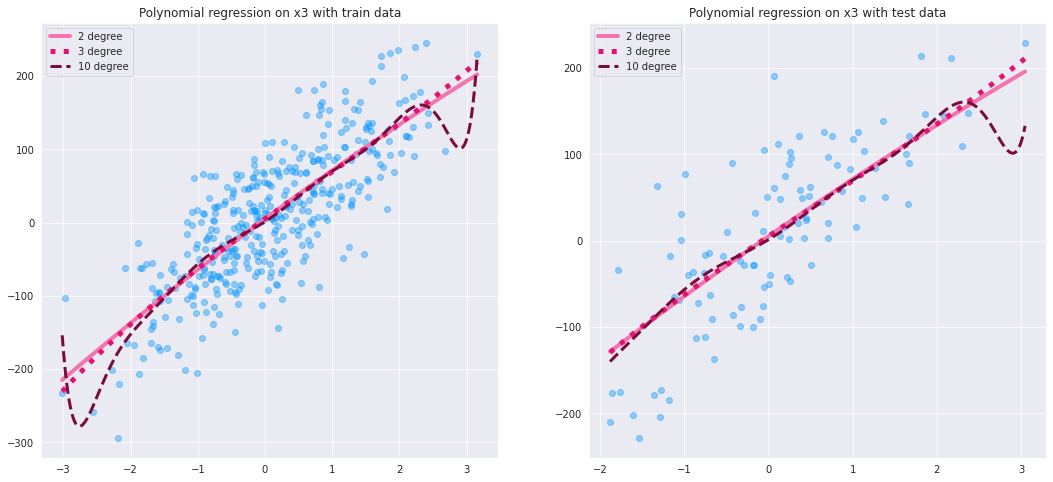

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# plt.figure(figsize=(10, 8))
ax1.scatter(X_train, y_train, color='#0496FF', alpha = 0.4)
ax1.plot(X_seq_train, polyreg_2.predict(X_seq_train), color="#F374AE", lw = 4, linestyle = 'solid', label='2 degree')
ax1.plot(X_seq_train, polyreg_3.predict(X_seq_train), color="#E31471", lw = 5, linestyle = 'dotted', label='3 degree')
ax1.plot(X_seq_train, polyreg_10.predict(X_seq_train), color="#7A0B3D", lw = 3, linestyle = 'dashed', label='10 degree')
ax1.set_title("Polynomial regression on x3 with train data")
ax1.legend()

ax2.scatter(X_test, y_test, color='#0496FF', alpha = 0.4)
ax2.plot(X_seq_test, polyreg_2.predict(X_seq_test), color="#F374AE", lw = 4, linestyle = 'solid', label='2 degree')
ax2.plot(X_seq_test, polyreg_3.predict(X_seq_test), color="#E31471", lw = 5, linestyle = 'dotted', label='3 degree')
ax2.plot(X_seq_test, polyreg_10.predict(X_seq_test), color="#7A0B3D", lw = 3, linestyle = 'dashed', label='10 degree')
ax2.set_title("Polynomial regression on x3 with test data")
ax2.legend()

In [ ]:
polyscore_df = polyscore_df.append(pd.DataFrame([[2, polyreg_2.score(X_train.reshape(-1,1), y_train),
                                                  polyreg_2.score(X_test.reshape(-1,1), y_test)],
                                                  [3, polyreg_3.score(X_train.reshape(-1,1), y_train), 
                                                  polyreg_3.score(X_test.reshape(-1,1), y_test)],
                                                  [10, polyreg_10.score(X_train.reshape(-1,1), y_train),
                                                  polyreg_10.score(X_test.reshape(-1,1), y_test)]], 
                                                columns=['Degree','R^2 train','R^2 test'], index=['x3', 'x3', 'x3']))

polyscore_df

,Degree,R^2 train,R^2 test
x1,2,0.009353,-0.016972
x1,3,0.009369,-0.016783
x1,10,0.024333,-0.018364
x2,2,0.330315,0.463348
x2,3,0.330825,0.460006
x2,10,0.342427,-8.610301
x3,2,0.615257,0.613285
x3,3,0.615758,0.612634
x3,10,0.622619,0.605706


## $$x_4$$

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X['x4'].values, Y.values, test_size=0.2, random_state=133)

X_seq_train = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
X_seq_test = np.linspace(X_test.min(),X_test.max(),300).reshape(-1,1)

polyreg_2=make_pipeline(PolynomialFeatures(2),LinearRegression())
polyreg_2.fit(X_train.reshape(-1,1),y_train)

polyreg_3=make_pipeline(PolynomialFeatures(3),LinearRegression())
polyreg_3.fit(X_train.reshape(-1,1),y_train)

polyreg_10=make_pipeline(PolynomialFeatures(10),LinearRegression())
polyreg_10.fit(X_train.reshape(-1,1),y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])

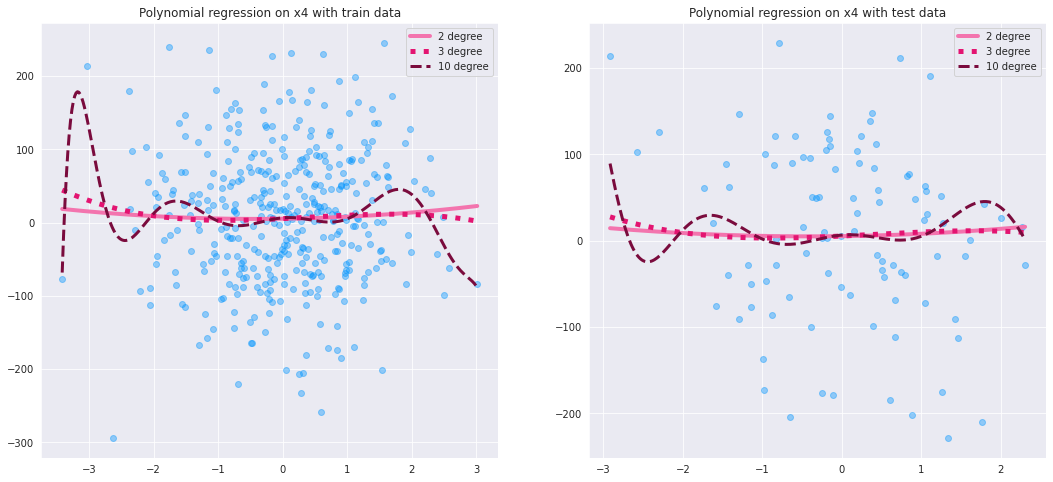

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# plt.figure(figsize=(10, 8))
ax1.scatter(X_train, y_train, color='#0496FF', alpha = 0.4)
ax1.plot(X_seq_train, polyreg_2.predict(X_seq_train), color="#F374AE", lw = 4, linestyle = 'solid', label='2 degree')
ax1.plot(X_seq_train, polyreg_3.predict(X_seq_train), color="#E31471", lw = 5, linestyle = 'dotted', label='3 degree')
ax1.plot(X_seq_train, polyreg_10.predict(X_seq_train), color="#7A0B3D", lw = 3, linestyle = 'dashed', label='10 degree')
ax1.set_title("Polynomial regression on x4 with train data")
ax1.legend()

ax2.scatter(X_test, y_test, color='#0496FF', alpha = 0.4)
ax2.plot(X_seq_test, polyreg_2.predict(X_seq_test), color="#F374AE", lw = 4, linestyle = 'solid', label='2 degree')
ax2.plot(X_seq_test, polyreg_3.predict(X_seq_test), color="#E31471", lw = 5, linestyle = 'dotted', label='3 degree')
ax2.plot(X_seq_test, polyreg_10.predict(X_seq_test), color="#7A0B3D", lw = 3, linestyle = 'dashed', label='10 degree')
ax2.set_title("Polynomial regression on x4 with test data")
ax2.legend()

In [ ]:
polyscore_df = polyscore_df.append(pd.DataFrame([[2, polyreg_2.score(X_train.reshape(-1,1), y_train),
                                                  polyreg_2.score(X_test.reshape(-1,1), y_test)],
                                                  [3, polyreg_3.score(X_train.reshape(-1,1), y_train), 
                                                  polyreg_3.score(X_test.reshape(-1,1), y_test)],
                                                  [10, polyreg_10.score(X_train.reshape(-1,1), y_train),
                                                  polyreg_10.score(X_test.reshape(-1,1), y_test)]], 
                                                columns=['Degree','R^2 train','R^2 test'], index=['x4', 'x4', 'x4']))

In [ ]:
polyscore_df = polyscore_df.reset_index()
polyscore_df = polyscore_df.set_index(['index','Degree'])
polyscore_df

R^2 train  R^2 test
index Degree                     
x1    2        0.009353 -0.016972
      3        0.009369 -0.016783
      10       0.024333 -0.018364
x2    2        0.330315  0.463348
      3        0.330825  0.460006
      10       0.342427 -8.610301
x3    2        0.615257  0.613285
      3        0.615758  0.612634
      10       0.622619  0.605706
x4    2        0.000764 -0.003707
      3        0.001628  0.003093
      10       0.026898 -0.032698

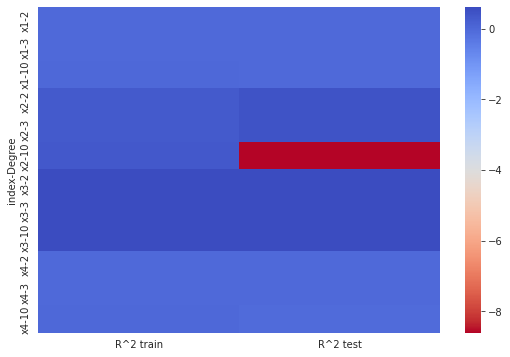

In [ ]:
fig = plt.figure(figsize=(9,6))
sns.heatmap(polyscore_df, cmap='coolwarm_r')